In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
df = pd.read_csv(r'C://Users//tamid.SHANNU//OneDrive//Desktop//bank-full.csv', sep=';')
df.head(20)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [9]:
print("\nColumns:\n", df.columns)
print("\nTarget value counts:\n", df['y'].value_counts())


Columns:
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Target value counts:
 y
no     39922
yes     5289
Name: count, dtype: int64


In [10]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [12]:
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [14]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [15]:
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.8978914774402831

Confusion Matrix:
 [[11676   290]
 [ 1095   503]]

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94     11966
        True       0.63      0.31      0.42      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564



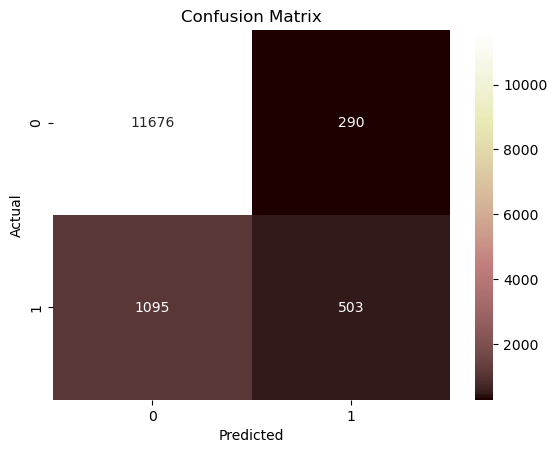

In [16]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="pink", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

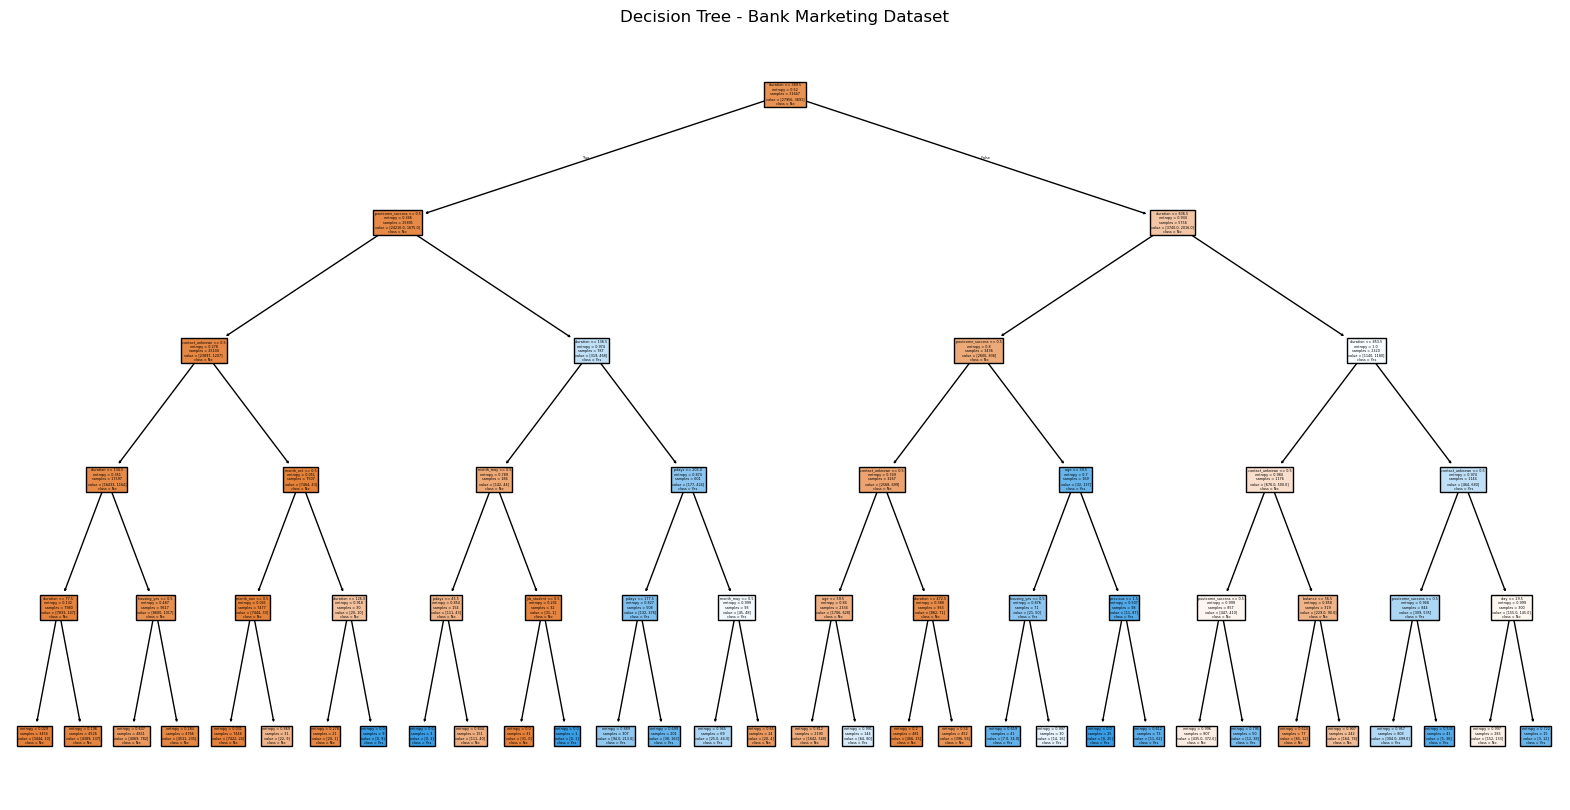

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree - Bank Marketing Dataset")
plt.show()


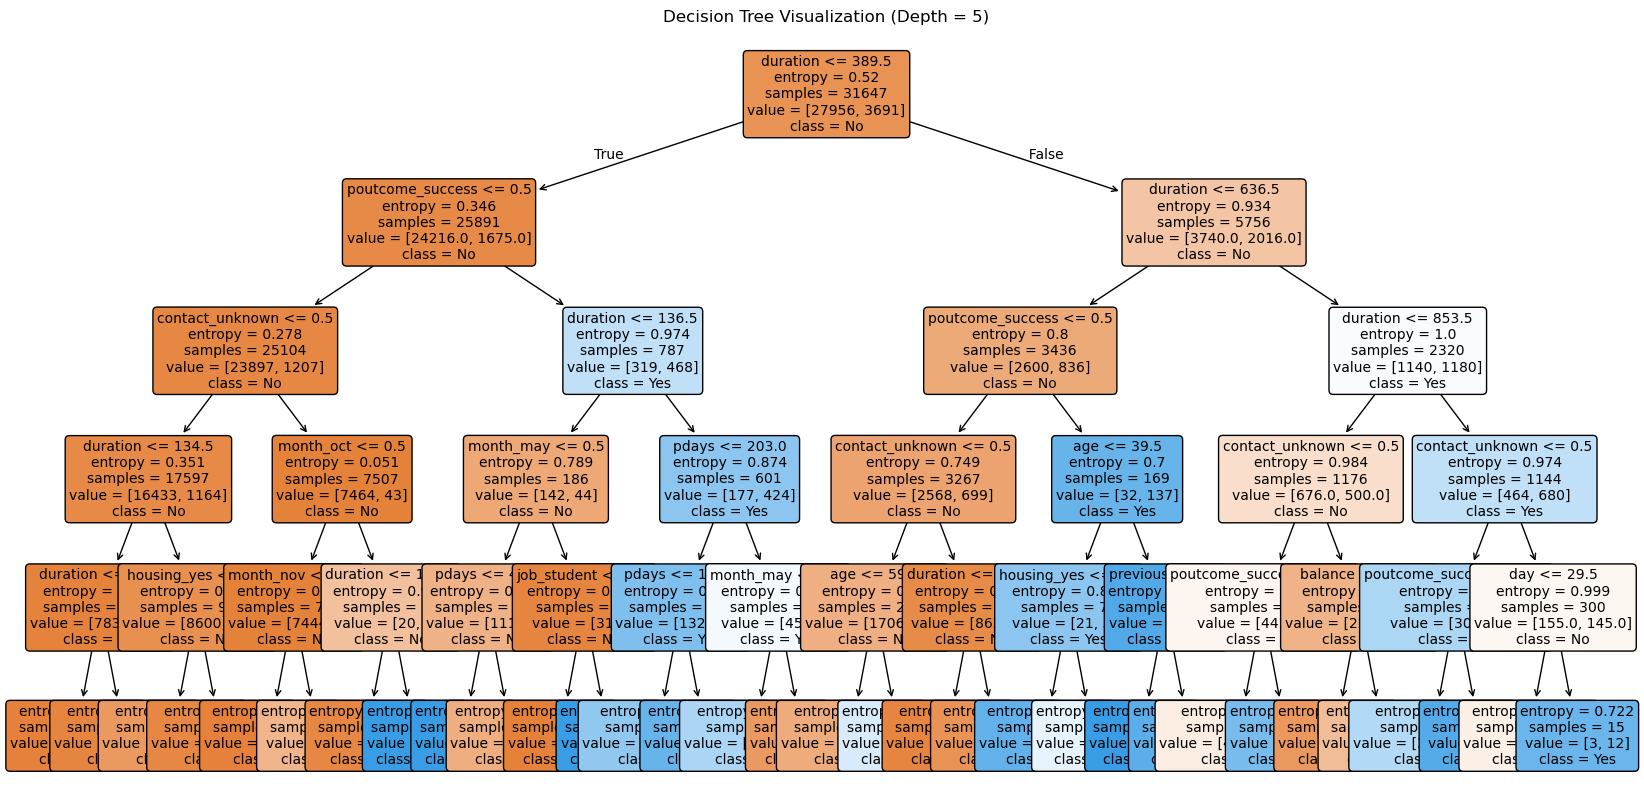

In [51]:
plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=["No", "Yes"], 
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization (Depth = 5)")
plt.show()